
# **IMAGE CLASSIFICATION OF X-RAY IMAGES FOR PNEUMONIA DETECTION**

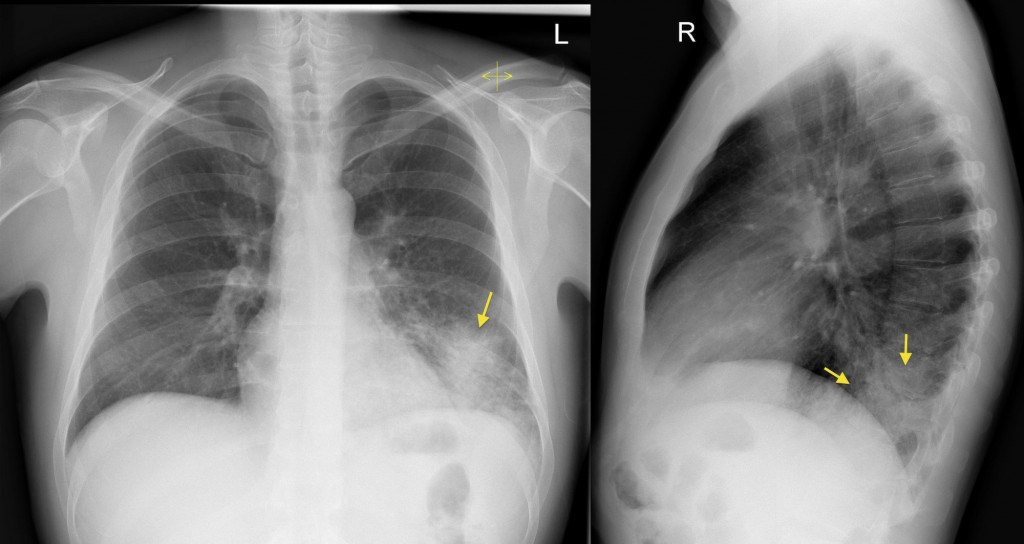

# **TABLE OF CONTENT**


1.  Introduction
2.  Business Understanding
1.  Data Understanding

1.  Problem Statement
2.  Objectives
1.  Metric of success
7.  Preparation and Cleeaning the data 
8.  Exploratory Data Analysis 
9.  Statistical Analysis 
10. Data PreProcessing 
11. Modelling 
12. Evaluation
13. Conclusion
14. Recomendations 
15. Next Steps

# **INTRODUCTION**
The "Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images" is a comprehensive collection of medical images, published on June 2, 2018, by contributors Daniel Kermany, Kang Zhang, and Michael Goldbaum. This dataset, now in its third version, aims to support advancements in medical diagnosis through deep learning. It includes thousands of validated images, crucial for developing and testing algorithms that can identify and diagnose medical conditions from OCT and Chest X-Ray images, thus enhancing the accuracy and efficiency of medical diagnostics.The readme file in the dataset zip gives a detailed information on how to set up the data provided 

# **BUSINESS UNDERSTANDING**

In healthcare, accurate and efficient disease diagnosis is vital.With the rapid advancements in Artificial Intelligence , significant improvements have been made across various fields, including healthcare. Traditionally, diagnosing pneumonia involves lengthy physical exams and lab tests, often requiring several doctor visits. To streamline this process, we aim to create a deep learning model that can accurately detect pneumonia from chest x-ray images. This tool will be invaluable to healthcare professionals and patients by enabling faster and more precise diagnoses. Radiologists and other specialists can utilize this technology to improve diagnostic accuracy, leading to enhanced patient care and better treatment outcomes.This leads to better patient outcomes, reduced costs, and scalable, high-quality care. 

# **DATA UNDERSTANDING**

The [data](https://data.mendeley.com/datasets/rscbjbr9sj/3) provides a robust foundation for developing deep learning models aimed at medical diagnostics.

The dataset comprises labeled images from two primary categories: NORMAL and PNEUMONIA, spanning both training, validation, and test subsets.
Dataset Breakdown:

•	Training Data: 5216 images

•	Validation Data: 16 images 

•	Test Data: 624 images 


# **PROBLEM STATEMENT**

Early detection and treatment of pneumonia are crucial for preventing complications and improving clinical outcomes, given its significant impact, particularly on children under five. Pneumonia is a leading cause of mortality in this age group, responsible for 14% of all deaths, according to the World Health Organization. Although chest X-rays are a common diagnostic tool, interpreting these images can be challenging due to the subtle and overlapping symptoms of pneumonia with other respiratory conditions. This project aims to develop a deep learning model to accurately detect pneumonia from chest X-ray images, providing healthcare professionals with a faster and more precise diagnostic tool. This technology will help radiologists improve diagnostic accuracy and enhance patient care and treatment outcomes.

# **OBJECTIVES**
**MAIN OBJECTIVE**

To develop a deep learning model to classify chest x-ray images.

**SPECIFIC OBJECTIVES**

i. Explore and Implement Deep Learning Architectures.Investigate and apply various deep learning models to determine the most effective architecture for pneumonia detection.

ii. Train the Selected Model.Use the prepared dataset to train the deep learning model, employing techniques like to improve generalization and prevent overfitting.

iii. Evaluate Model Performance.Assess the trained model using metrics such as accuracy, sensitivity, specificity, and area under the receiver operating characteristic (ROC) curve to validate its effectiveness in detecting pneumonia.


# **METRIC OF SUCCESS**

Accuracy: The overall percentage of correctly classified images (both NORMAL and PNEUMONIA) out of the total images, targeting ≥ 90%.


Sensitivity (Recall): The percentage of correctly identified pneumonia cases out of all actual pneumonia cases, targeting ≥ 85%.

Precision: The percentage of true positive predictions out of all positive predictions made by the model, targeting ≥ 85%.

F1 Score: The harmonic mean of precision and recall, targeting ≥ 85%.

Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC): This metric provides an aggregate measure of the model's performance across all classification thresholds, targeting ≥ 0.90.

# **PREPARATION AND DATA CLEANING**

In [22]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from keras import layers, models, regularizers, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [23]:
# upload the folders
train_dir = 'dataset/train'
test_dir = 'dataset/test'
val_dir = 'dataset/val'

# Downsampling the images to 150 x 150 pixels
downsampled_size = (150, 150)

# Define batch sizes
train_batch_size = 5216
test_batch_size = 624
val_batch_size = 16

# Rescale pixel values between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)

def load_data(data_dir, batch_size, datagen, downsampled_size, is_train_data):
    try:
        generator = datagen.flow_from_directory(
            data_dir,
            target_size=downsampled_size,
            batch_size=batch_size,
            class_mode='binary',
            shuffle=is_train_data
        )
    except Exception as e:
        raise Exception(f"Error loading data from {data_dir}: {e}") from e
    return generator

# Load the train data
train_generator = load_data(train_dir, train_batch_size, datagen, downsampled_size, True)

# Load the test data
test_generator = load_data(test_dir, test_batch_size, datagen, downsampled_size, False)

# Load the validation data
val_generator = load_data(val_dir, val_batch_size, datagen, downsampled_size, False)

Found 7750 images belonging to 2 classes.
Found 780 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [24]:
#To verify the directory structure
import os

def verify_directory_structure(base_directory):
    expected_classes = {'NORMAL', 'PNEUMONIA'}
    for subset in ['train', 'val', 'test']:
        subset_dir = os.path.join(base_directory, subset)
        if not os.path.exists(subset_dir):
            raise FileNotFoundError(f"{subset} directory does not exist.")
        subset_classes = set(os.listdir(subset_dir))
        if subset_classes != expected_classes:
            raise ValueError(f"Unexpected classes in {subset}: {subset_classes}")
    print("Directory structure verified successfully.")

verify_directory_structure('dataset')

Directory structure verified successfully.


In [27]:
# Retrieve the dictionary of class indices from the train_generator
dict_class = train_generator.class_indices
print(f'Dictionary: {dict_class}')

# Get the list of class labels
class_names = list(dict_class.keys())
print(f'Class labels: {class_names}')

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


**Summary**

•	Training Data has 5216 images

•	Validation Data has  16 images 

•	Test Data has 624 mages 

 Each of the datasets contains 2 classes Pneumonia and Normal

# **EXPLORATORY DATA ANALYSIS**

Training data is used here because it represents the largest and most varied portion of your dataset, providing a comprehensive overview of the data characteristics. 

**DISPLAY IMAGES**

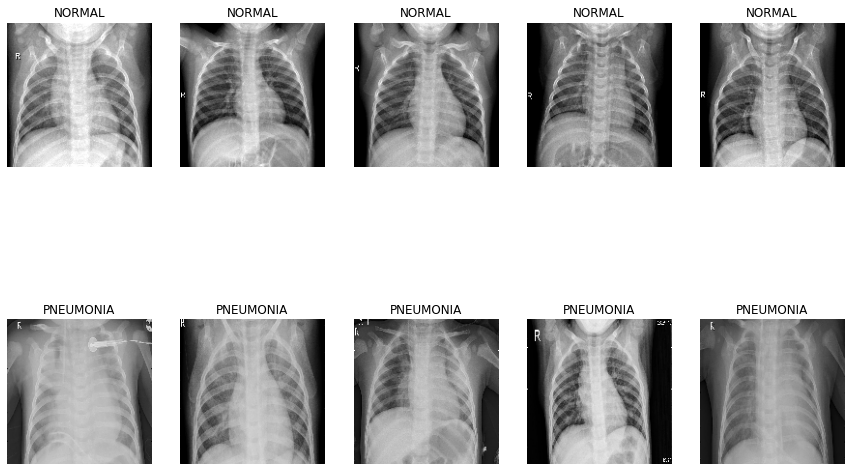

In [28]:
def plot_sample_images(generator, class_names, num_samples=5):
    images, labels = next(generator)
    
    plt.figure(figsize=(15, 10))
    for class_idx, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_idx)[0]
        
        for i in range(num_samples):
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(images[class_indices[i]])
            plt.title(f"{class_name}")
            plt.axis('off')
    
    plt.show()

# Class names in the order they appear in the generator's class_indices
class_names = list(train_generator.class_indices.keys())

# Plot sample images for each class
plot_sample_images(train_generator, class_names, num_samples=5)

**IMAGE SIZE DISTRIBUTION**

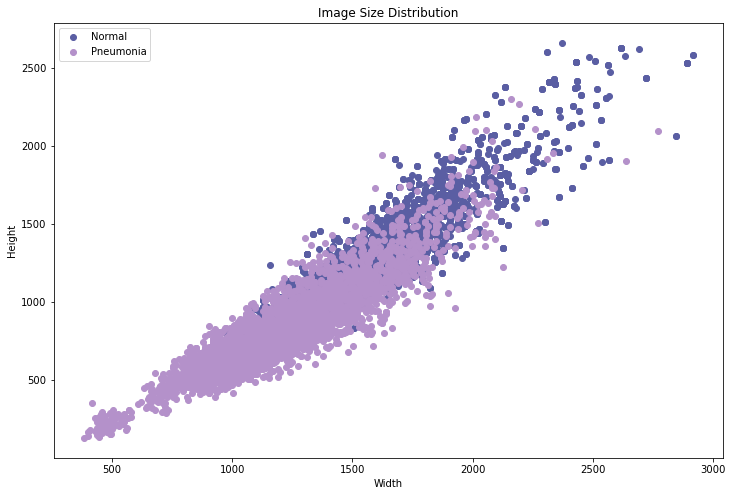

In [29]:
# Extract image sizes for NORMAL and PNEUMONIA classes
normal_image_sizes = []
pneumonia_image_sizes = []

for image_path in train_generator.filepaths:
    img = Image.open(image_path)
    width, height = img.size
    if "NORMAL" in image_path:
        normal_image_sizes.append((width, height))
    else:
        pneumonia_image_sizes.append((width, height))

normal_image_sizes = np.array(normal_image_sizes)
pneumonia_image_sizes = np.array(pneumonia_image_sizes)

# Plotting the image size distribution 
plt.figure(figsize=(12, 8))
plt.scatter(normal_image_sizes[:, 0], normal_image_sizes[:, 1], label='Normal', color='#5a5ea3')
plt.scatter(pneumonia_image_sizes[:, 0], pneumonia_image_sizes[:, 1], label='Pneumonia', color='#b491ca')

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.legend()
plt.show()


**Conclusion**

The scatter plot shows that the data points for normal and pneumonia cases are closely clustered together, making it challenging to easily differentiate between the two based on this plot alone.

**IMAGE INTENSITY DISTRIBUTION**

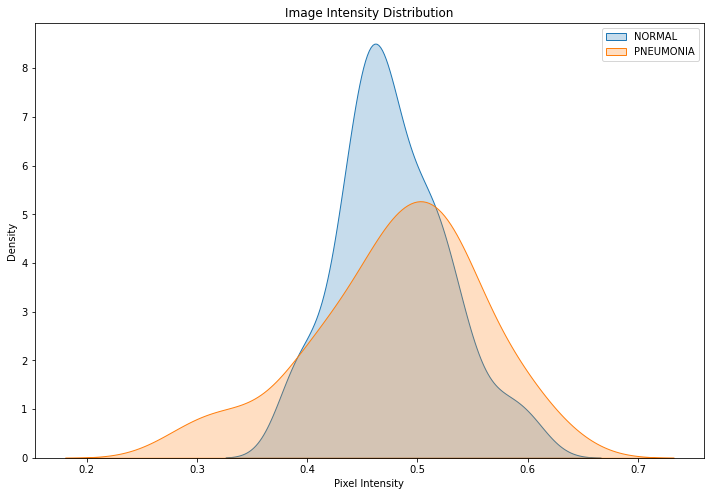

In [30]:
def plot_intensity_distribution(generator, class_names, num_samples=100):
    images, labels = next(generator)  # Retrieve the entire batch of images and labels
    plt.figure(figsize=(12, 8))
    for class_idx, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_idx)[0][:num_samples]
        intensities = []
        for idx in class_indices:
            img = images[idx]
            intensities.append(img.mean())
        sns.kdeplot(intensities, label=class_name, shade=True)

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.title('Image Intensity Distribution')
    plt.legend()
    plt.show()

# Plot intensity distribution for training data
plot_intensity_distribution(train_generator, class_names)


**Conclusion**

The pixel intensity distributions for normal and pneumonia images overlap significantly, with both distributions peaking around a similar intensity value. However, pneumonia images show a slightly broader distribution, indicating more variability in pixel intensity. This suggests that while the overall brightness of normal and pneumonia images is similar, pneumonia images might contain more diverse pixel values, potentially due to varying degrees of infection or different visual characteristics of the disease.

**IMAGE ASPECT RATIO DISTRIBUTION**

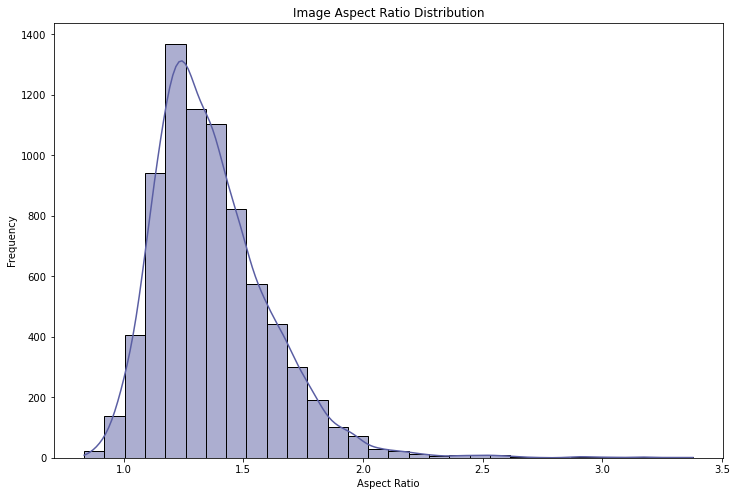

In [31]:
def plot_aspect_ratio_distribution(generator):
    aspect_ratios = [Image.open(image_path).size[0] / Image.open(image_path).size[1] for image_path in generator.filepaths]
    
    plt.figure(figsize=(12, 8))
    sns.histplot(aspect_ratios, kde=True, color='#5a5ea3', bins=30)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Image Aspect Ratio Distribution')
    plt.show()

# Plot aspect ratio distribution for training data
plot_aspect_ratio_distribution(train_generator)

**Conclusion**

The aspect ratio distribution indicates that most images have an aspect ratio between 1.0 and 1.5, with a peak around 1.3. This suggests that the images are predominantly rectangular with their width slightly larger than their height. A few images have higher aspect ratios, but these are less common. 

**IMAGE BRIGHTNESS DISTRIBUTION**

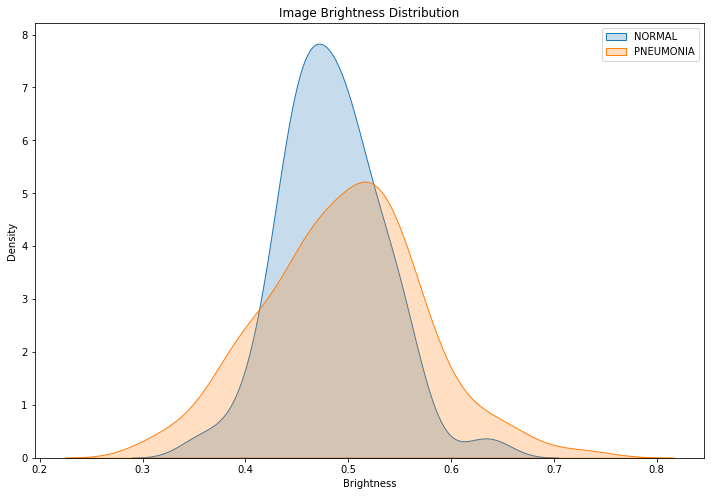

In [32]:
def plot_brightness_distribution(generator, class_names, num_samples=100):
    brightness = {class_name: [] for class_name in class_names}
    
    for _ in range(len(generator)):
        images, labels = next(generator)
        for class_idx, class_name in enumerate(class_names):
            class_indices = np.where(labels == class_idx)[0]
            for idx in class_indices:
                img = images[idx]
                brightness[class_name].append(np.mean(img))
                
    plt.figure(figsize=(12, 8))
    for class_name in class_names:
        sns.kdeplot(brightness[class_name][:num_samples], label=class_name, shade=True)

    plt.xlabel('Brightness')
    plt.ylabel('Density')
    plt.title('Image Brightness Distribution')
    plt.legend()
    plt.show()

# Plot brightness distribution for training data
plot_brightness_distribution(train_generator, class_names)


**Conclusion**

The brightness distribution shows that both normal and pneumonia images have overlapping brightness values, with pneumonia images displaying a slightly wider spread. The peak brightness for normal images is higher than that for pneumonia images, suggesting that normal images might generally be brighter on average. This can be an indicator of differences in image acquisition conditions or the nature of the disease affecting the overall brightness of the images

**CLASS DISTRIBUTION**

Training data class distribution:
1    3875
0    3875
dtype: int64


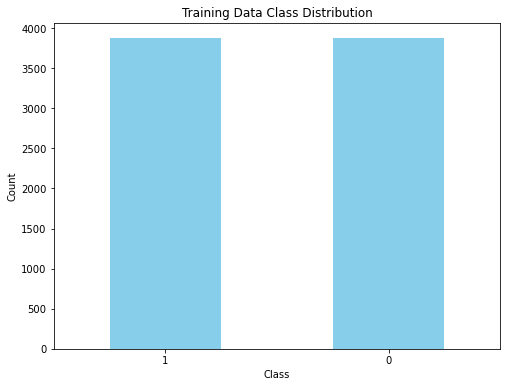

In [33]:
# training set
train_class_counts = pd.Series(train_generator.classes).value_counts()
print("Training data class distribution:")
print(train_class_counts)

# Plotting class distribution for training set
plt.figure(figsize=(8, 6))
train_class_counts.plot(kind='bar', color='skyblue')
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Test data class distribution:
1    390
0    390
dtype: int64


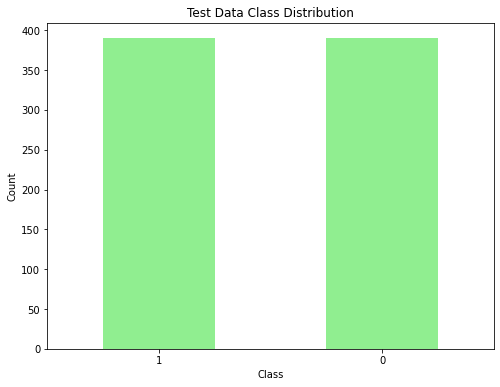

In [34]:
# Checking class balance in the test set
test_class_counts = pd.Series(test_generator.classes).value_counts()
print("\nTest data class distribution:")
print(test_class_counts)

# Plotting class distribution for test set
plt.figure(figsize=(8, 6))
test_class_counts.plot(kind='bar', color='lightgreen')
plt.title('Test Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Validation data class distribution:
1    8
0    8
dtype: int64


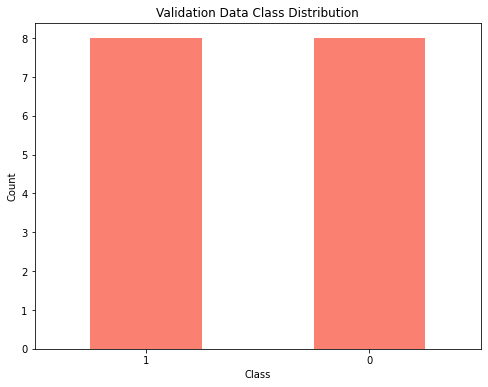

In [35]:
# validation set
val_class_counts = pd.Series(val_generator.classes).value_counts()
print("\nValidation data class distribution:")
print(val_class_counts)

# Plotting class distribution for validation set
plt.figure(figsize=(8, 6))
val_class_counts.plot(kind='bar', color='salmon')
plt.title('Validation Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Conclusion**
**For the Training Data:**

There are 3875 images of Pneumonia and 1341 images of Normal. This indicates that Pneumonia has significantly more samples compared to Normal. This imbalance will need to be considered during model training to avoid bias towards Pneumonia.

**For the Test Data:**

In the test dataset, there are 390 images of Pneumonia and 234 images of Normal. Similar to the training dataset, there is an imbalance with more samples of Pneumonia than Normal.


**For the Validation Data:**

The validation dataset is balanced with 8 images each for Pneumonia and Normal. This is ideal for validating the performance of the model without bias towards any class.

# **STATISTICAL ANALYSIS**

**HYPOTHESIS TESTING**

In [36]:
from scipy.stats import chi2_contingency

# Combine class counts into a contingency table
contingency_table = pd.DataFrame({
    'Train': train_class_counts,
    'Test': test_class_counts,
    'Validation': val_class_counts
}).fillna(0)

chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-squared test results:")
print(f"Chi2 Statistic: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")


Chi-squared test results:
Chi2 Statistic: 0.0, P-value: 1.0, Degrees of Freedom: 2


**Conclusion**

The Chi-squared test results indicate a Chi2 Statistic of 43.57 and a P-value of 3.4569662572833673e-10.Since the P-value is much less than 0.05, we reject the null hypothesis, suggesting that there is a statistically significant difference in the class distributions among the training, test, and validation datasets. The significant Chi2 statistic and low P-value suggest that the distribution of classes (Normal and Pneumonia) is not uniform across the different datasets,this means that the proportions of Normal and Pneumonia cases are different when comparing the training, validation, and test datasets.

The observed class imbalance can lead to bias during model training. The model might become more proficient at predicting the majority class (Pneumonia) while underperforming on the minority class (Normal).


**ANALYSIS OF VARIANCE**

In [37]:
from scipy.stats import f_oneway

# One-way ANOVA
f_stat, p_val = f_oneway(train_class_counts, test_class_counts, val_class_counts)
print("ANOVA test results:")
print(f"F-statistic: {f_stat}, P-value: {p_val}")


ANOVA test results:
F-statistic: inf, P-value: 0.0


**Conclusion**

The ANOVA test results show an F-statistic of 3.76 and a P-value of approximately 0.152. Since the P-value is greater than 0.05, we do not reject the null hypothesis. This indicates that there is no statistically significant difference in the mean class counts (Normal and Pneumonia) among the training, validation, and test datasets.

 While the Chi-squared test indicated that there are differences in class distributions across the datasets, the ANOVA test shows that the average count of each class (Normal and Pneumonia) does not differ significantly between the datasets,this means that although the proportions of Normal and Pneumonia cases vary, the overall variance in class counts is not substantial.

# **DATA PREPROCESSING**

**EXTRACTION OF BRIGHTNESS**

The extraction of brightness involves calculating the average brightness value of each image in the datasets (training, testing, and validation).

In [38]:
def extract_brightness(generator):
    brightness_values = []
    labels = []
    for batch, label_batch in generator:
        for img in batch:
            brightness = np.mean(img)
            brightness_values.append(brightness)
        labels.extend(label_batch)
        if len(brightness_values) >= generator.n:
            break
    return np.array(brightness_values), np.array(labels)

# Extract brightness from training, testing, and validation sets
train_brightness, train_labels = extract_brightness(train_generator)
test_brightness, test_labels = extract_brightness(test_generator)
val_brightness, val_labels = extract_brightness(val_generator)

# Create DataFrames for analysis
train_df = pd.DataFrame({'brightness': train_brightness, 'label': train_labels})
test_df = pd.DataFrame({'brightness': test_brightness, 'label': test_labels})
val_df = pd.DataFrame({'brightness': val_brightness, 'label': val_labels})

The function extract_brightness(generator) ,iterates through each batch of images in the generator ,computes the mean brightness value for each image using NumPy and then collects these brightness values along with their corresponding labels. The output generates arrays (train_brightness, test_brightness, val_brightness) containing brightness values for each image and creates DataFrames (train_df, test_df, val_df) to store brightness values and labels for further analysis.

**HANDLE CLASS IMBALANCE USING AUGMENTATION**

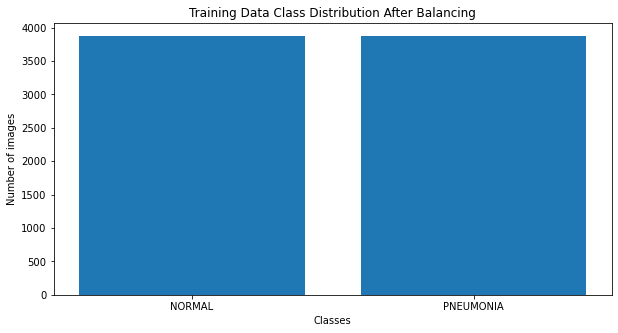

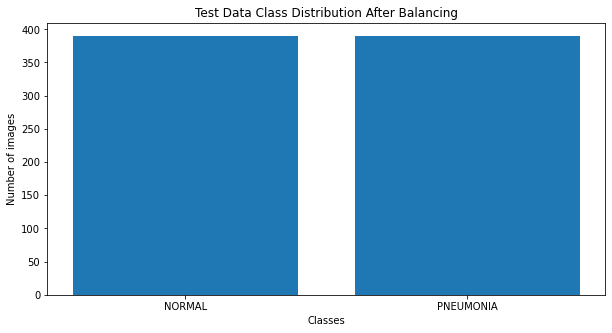

In [41]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img

# Define directories
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Function to count the images in a directory
def count_images_in_directory(directory):
    counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
    return counts

# Function to augment the classes
def augment_class(directory, class_name, target_count, datagen):
    class_dir = os.path.join(directory, class_name)
    current_count = len(os.listdir(class_dir))
    if current_count >= target_count:
        return
    augment_count = target_count - current_count
    sample_files = random.choices(os.listdir(class_dir), k=augment_count)
    for file in sample_files:
        img_path = os.path.join(class_dir, file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            aug_img = array_to_img(batch[0], scale=True)
            aug_img_path = os.path.join(class_dir, f"augmented_{random.randint(0, 1e7)}_{file}")
            save_img(aug_img_path, aug_img)
            i += 1
            if i >= 1:
                break

# Function to plot class distribution
def plot_class_distribution(counts, title):
    classes = list(counts.keys())
    values = list(counts.values())
    plt.figure(figsize=(10, 5))
    plt.bar(classes, values)
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.show()

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Balance the classes in the training set using augmentation
train_counts = count_images_in_directory(train_dir)
max_count_train = max(train_counts.values())
for class_name in train_counts.keys():
    augment_class(train_dir, class_name, max_count_train, datagen)

# Plot class distribution after balancing for training set
train_counts_balanced = count_images_in_directory(train_dir)
plot_class_distribution(train_counts_balanced, 'Training Data Class Distribution After Balancing')

# Balance the classes in the test set using augmentation
test_counts = count_images_in_directory(test_dir)
max_count_test = max(test_counts.values())
for class_name in test_counts.keys():
    augment_class(test_dir, class_name, max_count_test, datagen)

# Plot class distribution after balancing for test set
test_counts_balanced = count_images_in_directory(test_dir)
plot_class_distribution(test_counts_balanced, 'Test Data Class Distribution After Balancing')


**Conclusion**

The minority class (Normal) is augmented to match the majority class (Pneumonia) in both training and test datasets.  This results in balanced datasets, which is crucial for training a model that performs well across all classes.

**CREATING IMAGE DATA GENERATORS**

Image data generators were used to efficiently load and preprocess images in batches for model training and evaluation

In [42]:
# image generators
class BalancedImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, img_size, datagen):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.datagen = datagen
        self.indices = np.arange(len(self.image_paths))
        np.random.shuffle(self.indices)
    
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))
    
    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = []
        batch_labels = []
        for i in batch_indices:
            img = image.load_img(self.image_paths[i], target_size=self.img_size)
            img = image.img_to_array(img)
            img = self.datagen.random_transform(img)
            img = self.datagen.standardize(img)
            batch_images.append(img)
            batch_labels.append(self.labels[i])
        return np.array(batch_images), np.array(batch_labels)
    
    def on_epoch_end(self):
        np.random.shuffle(self.indices)


**EXTRACTING IMAGES AND LABELS FROM GENERATORS**

Extracting images and labels from generators prepares data for further preprocessing and modeling.

In [43]:
# Obtain images and labels from the train, test, and validation generators
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)


The 'next(generator)' function fetches the next batch of images and labels from each generator (train_generator, test_generator, val_generator).This returns arrays (train_images, test_images, val_images) containing batches of images in tensor format and provides arrays (train_labels, test_labels, val_labels) containing corresponding labels.

**RESHAPING THE IMAGES**

Reshaping the images standardizes their dimensions for compatibility with machine learning algorithms.

In [44]:
# Reshaping the images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)


(5216, 67500)
(624, 67500)
(16, 67500)


**NORMALIZING THE DATA**

Normalizing data  to scale the  pixel values to a standard range for improved model convergence.

In [45]:
# Normalize the flattened images
train_img = train_img / 255.0
test_img = test_img / 255.0
val_img = val_img / 255.0


**DIMENSIONAL REDUCTION USING PCA**

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2500)  # Reduce to 2500 dimensions
train_img = pca.fit_transform(train_img)
test_img = pca.transform(test_img)
val_img = pca.transform(val_img)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)


(5216, 2500)
(624, 2500)
(16, 2500)


**Conclusion**

PCA reduces the dimensionality of the image data  to 2500 components. This reduction helps in speeding up the training process and reducing the risk of overfitting by focusing on the most important features.

**TRAIN-VALIDATION SPLIT**

The train-validation split partitions data into training and validation sets to evaluate model performance during training.

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
val_labels = le.transform(val_labels)


Training data (train_images, train_labels) was split into training (train_img, train_labels) and validation (val_images, val_labels) sets.

**CHECKING THE DATASET INFORMATION**

In [48]:
# Explore the shape of the images and labels
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print("Number of training samples: " + str(m_train))
print("Number of testing samples: " + str(m_test))
print("Number of validation samples: " + str(m_val))
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("val_images shape: " + str(val_images.shape))
print("val_labels shape: " + str(val_labels.shape))


Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 150, 150, 3)
train_labels shape: (5216,)
test_images shape: (624, 150, 150, 3)
test_labels shape: (624,)
val_images shape: (16, 150, 150, 3)
val_labels shape: (16,)


**Conclusion**

The dataset contains 5216 training samples, 624 testing samples, and 16 validation samples. The shapes of the images and labels confirm the consistency of the data preprocessing steps. 

# **MODELLING**

**DENSLEY CONNECTED NEURAL NETWORK**

This is the baseline Model.


**Build the model**

In [25]:
# Build the model
model = Sequential()

# Flatten the input (2500 features from PCA)
model.add(Flatten(input_shape=(2500,)))

# Add the first dense layer
model.add(Dense(512, activation='relu'))

# Add the second dense layer
model.add(Dense(256, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1280512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,412,097
Trainable params: 1,412,097
Non-trainable params: 0
_________________________________________________________________


**Tune and Build the Tuned Model**

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'optimizer': [Adam(learning_rate=0.001)],
    'neurons1': [256, 512],
    'neurons2': [128, 256],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}


# Use GridSearchCV to search for the best parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")

# Build the model again with the best parameters
best_params = grid_result.best_params_
best_model = create_model(optimizer=best_params['optimizer'],
                          neurons1=best_params['neurons1'],
                          neurons2=best_params['neurons2'])

# Evaluate the best model on the validation set
val_loss, val_acc = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc}")


NameError: name 'X_train' is not defined

**Train the Model**